# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | bodo
Processing Record 3 of Set 1 | keflavik
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | palo santo
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | harper
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | nkurenkuru
City not found. Skipping...
Processing Record 10 of Set 1 | mahibadhoo
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | kanniyakumari
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,11.52,78,30,0.45,AU,1709588918
1,bodo,67.2800,14.4050,1.86,78,38,6.35,NO,1709588918
2,keflavik,64.0049,-22.5624,5.67,81,92,9.21,IS,1709588918
3,port-aux-francais,-49.3500,70.2167,6.69,80,93,14.99,TF,1709588918
4,palo santo,-25.5633,-59.3378,25.98,79,96,0.06,AR,1709588919


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,11.52,78,30,0.45,AU,1709588918
1,bodo,67.2800,14.4050,1.86,78,38,6.35,NO,1709588918
2,keflavik,64.0049,-22.5624,5.67,81,92,9.21,IS,1709588918
3,port-aux-francais,-49.3500,70.2167,6.69,80,93,14.99,TF,1709588918
4,palo santo,-25.5633,-59.3378,25.98,79,96,0.06,AR,1709588919


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

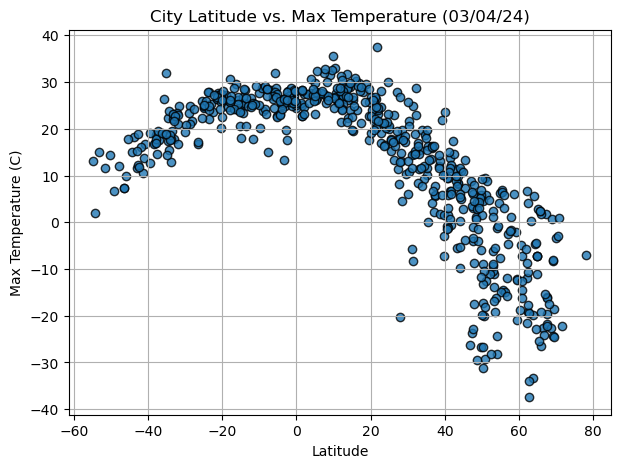

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

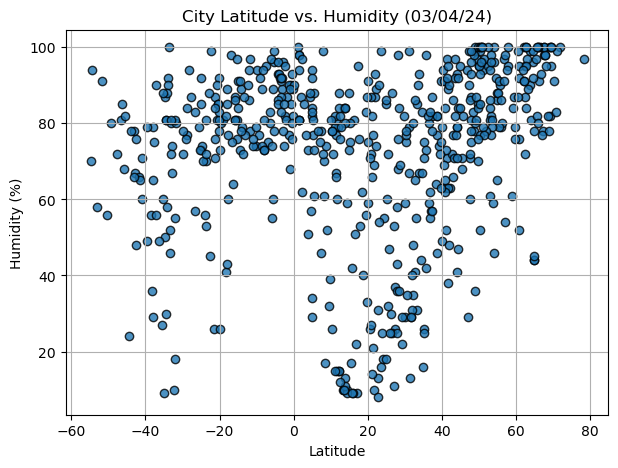

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

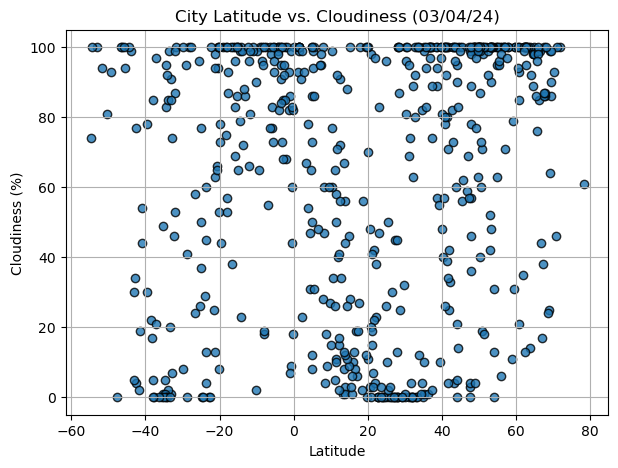

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

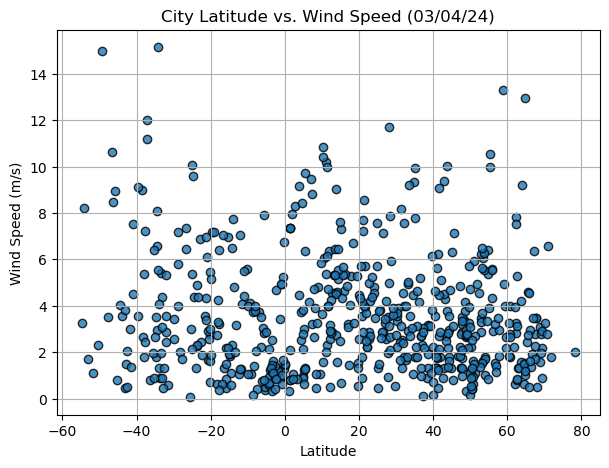

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, ylabel, coordinates):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bodo,67.2800,14.4050,1.86,78,38,6.35,NO,1709588918
2,keflavik,64.0049,-22.5624,5.67,81,92,9.21,IS,1709588918
5,harper,4.3750,-7.7169,27.39,87,47,3.74,LR,1709588919
7,mahibadhoo,3.7833,72.9667,27.70,73,54,4.46,MV,1709588920
10,tazovsky,67.4667,78.7000,-19.66,98,100,2.80,RU,1709588921


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,11.52,78,30,0.45,AU,1709588918
3,port-aux-francais,-49.3500,70.2167,6.69,80,93,14.99,TF,1709588918
4,palo santo,-25.5633,-59.3378,25.98,79,96,0.06,AR,1709588919
6,edinburgh of the seven seas,-37.0676,-12.3116,17.52,90,97,11.17,SH,1709588919
8,waitangi,-43.9535,-176.5597,18.23,78,99,3.58,NZ,1709588920


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7341848892468505


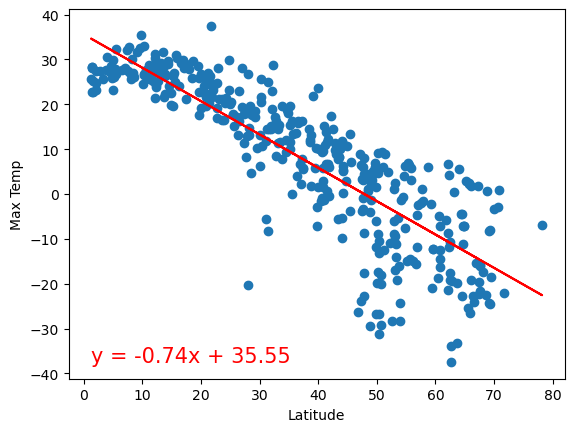

In [24]:
# Define x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Linear regression on Northern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the plot linear regression function for Nothern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print!
print("The r-squared is:", r_value**2)
plt.show()

The r-squared is: 0.5055588500217254


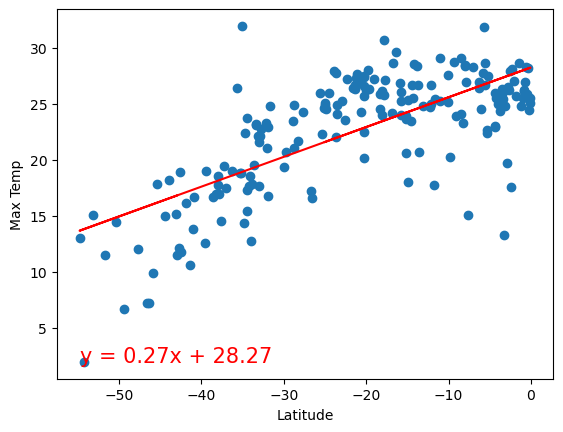

In [23]:
# Define x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Linear regression on Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the plot linear regression function for Southern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print!
print("The r-squared is:", r_value**2)
plt.show()

**Discussion about the linear relationship:** The regression line slope for the Southern Hemisphere is positive, signifying an increase in maximum temperature as one approaches the equator. Conversely, in the Northern Hemisphere, the regression line's negative slope illustrates that maximum temperature decreases with increasing distance from the equator. These patterns affirm that temperatures are higher near the equator and decrease towards the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16701782348902625


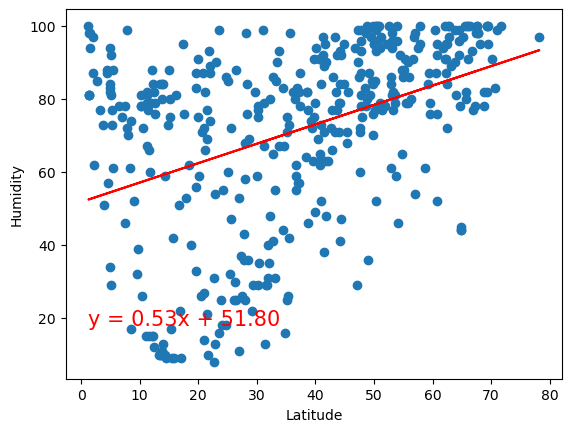

In [26]:
# Define x and y values for the linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Northern Hemisphere linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)+10), fontsize=15, color="red")

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

The r-squared is: 0.15651555099596193


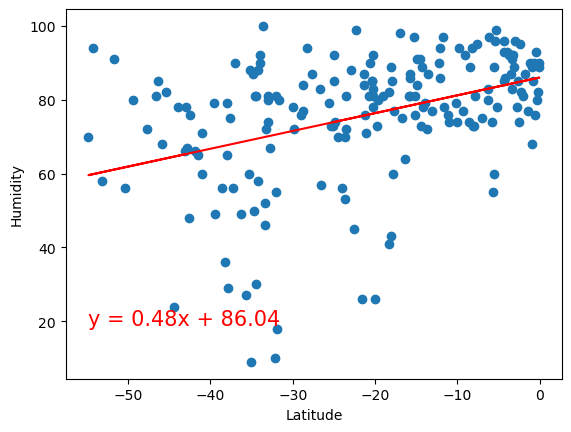

In [27]:
# Define x and y values for the linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Southern Hemisphere linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)+10), fontsize=15, color="red")

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the linear regression analysis shows a positive slope, due to the common expectation that there is a slight increase in humidity as one moves from the equator towards the poles. As for the southern hemisphere, the linear regression between humidity and latitude, displays a slight positive slope, suggesting that humidity increases as one moves closer to the equator. The r-squared value would be crucial in determining the strength of the relationship between latitude and humidity. The strength of these relationships is gauged by the r-squared value, with a higher value in the Southern Hemisphere suggesting a more uniform pattern in humidity distribution relative to latitude.tude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11987261126715376


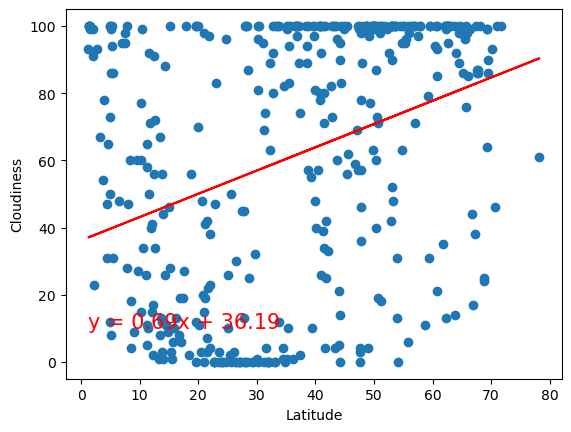

In [33]:
# Define x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Northern Hemisphere linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)+10), fontsize=15, color="red")

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

The r-squared is: 0.10228528483288041


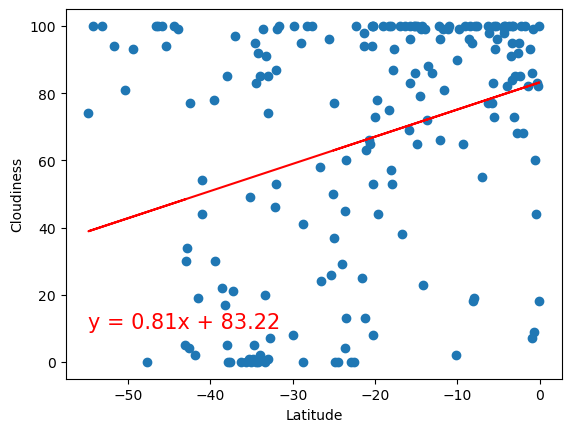

In [34]:
# Define x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Southern Hemisphere linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)+10), fontsize=15, color="red")

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

**Discussion about the linear relationship:** 
The regression analysis for both the Northern and Southern Hemispheres reveals a positive slope, indicating a slight increase in cloudiness with latitude in both directions from the equator.However, the low r-squared value, particularly noted in the Northern Hemisphere as "0.04221767784533342", underscores that latitude is not a significant predictor of cloudiness levels. This suggests that other factors beyond latitude play a crucial role in determining cloudiness across different regions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.034192610018864276


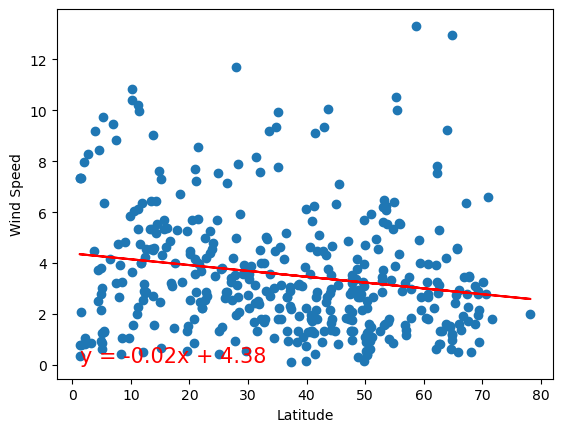

In [35]:
# Define x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Northern Hemisphere linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

The r-squared is: 0.10281854941220178


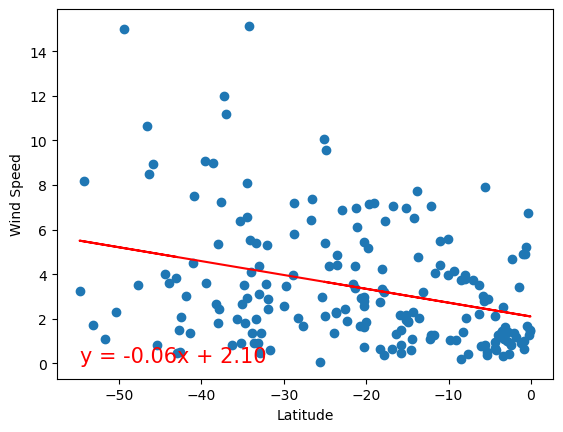

In [36]:
# Define x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Southern Hemisphere linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, an r-squared value below 0.05 means there's a real connection between latitude and wind speed—essentially, as you go further from the equator, wind speed tends to drop. This finding is statistically solid. On the flip side, in the Southern Hemisphere, an r-squared value above 0.05 indicates that the link between latitude and wind speed isn't strong or clear-cut. Even though we also see wind speed decreasing with higher latitudes here, we can't confidently say that latitude is the reason behind this pattern.